In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
import utility as u

train_file = "data_train.txt"
test_file = "shuffle_data_test.txt"
data_folder = 'data'
columns = ['click', 'weekday', 'hour', 'timestamp', 'log_type', 'user_id', 'user_agent', 'ip', 'region', 'city',
           'ad_exchange', 'domain', 'url', 'anon_url_id', 'ad_slot_id', 'width', 'height', 'visibility', 'format',
           'price', 'creative_id', 'key_page_url', 'advertiser_id', 'user_tags']

train, test = u.import_tr_te(train_file, test_file, columns, data_folder)

In [3]:
train.head()

,click,weekday,hour,timestamp,log_type,user_id,user_agent,ip,region,city,...,ad_slot_id,width,height,visibility,format,price,creative_id,key_page_url,advertiser_id,user_tags
0,0,6,0,20130606000104308,1,VhT3La5uDlaywOj,windows_chrome,122.233.40.*,94,95,...,mm_10058411_2865562_9929053,300,250,2,1,0,44966cc8da1ed40c95d59e863c8c75f0,361e128affece850342293213691a043,3386,"10057,10063,10024,13800,13866,10110"
1,0,6,0,20130606000104371,1,Vhk0Z35ULqFcBZc,windows_ie,180.107.223.*,80,85,...,4017603800,336,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,361e128affece850342293213691a043,3386,"10063,10059,13776,10111"
2,0,6,0,20130606000104420,1,Vhk7ZAnxPcKOjCb,windows_ie,111.120.123.*,298,299,...,2141208056,250,250,2,0,5,7097e4210dea4d69f07f0f5e4343529c,361e128affece850342293213691a043,3386,"10063,10111"
3,0,6,0,20130606000104436,1,VhkY1nFEPlkyeIC,windows_ie,112.95.93.*,216,219,...,415540879,250,250,2,0,5,7097e4210dea4d69f07f0f5e4343529c,361e128affece850342293213691a043,3386,10048
4,0,6,0,20130606000104450,1,VhLrOxuUPqd63CL,windows_chrome,113.200.249.*,333,334,...,2811067692,250,250,2,0,5,7097e4210dea4d69f07f0f5e4343529c,361e128affece850342293213691a043,3386,"10006,10057,14273"


In [5]:
train.shape

(2847802, 24)

In [16]:
train.describe()

,click,weekday,hour,timestamp,log_type,region,city,ad_exchange,width,height,visibility,format,price,advertiser_id
count,2847802.000000,2847802.000000,2847802.000000,2.847802e+06,2847802,2847802.000000,2847802.000000,2847802.000000,2847802.000000,2847802.000000,2847802.000000,2847802.000000,2847802.000000,2847802
mean,0.000729,3.005293,13.788004,2.013061e+16,1,145.166020,150.065017,2.198610,580.746215,183.571554,2.243363,0.277444,29.441337,3386
std,0.026990,2.037767,6.625501,2.021288e+09,0,103.819625,105.043981,0.793964,320.683441,120.106046,19.892124,0.640043,36.785039,0
min,0.000000,0.000000,0.000000,2.013061e+16,1,0.000000,0.000000,1.000000,120.000000,60.000000,0.000000,0.000000,0.000000,3386
25%,0.000000,1.000000,10.000000,2.013061e+16,1,65.000000,75.000000,2.000000,300.000000,90.000000,0.000000,0.000000,4.000000,3386
50%,0.000000,3.000000,15.000000,2.013061e+16,1,146.000000,146.000000,2.000000,468.000000,90.000000,0.000000,0.000000,10.000000,3386
75%,0.000000,5.000000,19.000000,2.013061e+16,1,216.000000,221.000000,3.000000,1000.000000,250.000000,2.000000,0.000000,50.000000,3386
max,1.000000,6.000000,23.000000,2.013061e+16,1,395.000000,399.000000,3.000000,1000.000000,600.000000,255.000000,5.000000,300.000000,3386


In [3]:
# count unique values in each column
for c in train.columns:
    print(c+" : ")
    print(len(train[c].unique()))

click : 
2
weekday : 
7
hour : 
24
timestamp : 
2434838
log_type : 
1
user_id : 
2641292
user_agent : 
36
ip : 
489690
region : 
35
city : 
370
ad_exchange : 
3
domain : 
15146
url : 
715316
anon_url_id : 
1
ad_slot_id : 
51529
width : 
11
height : 
6
visibility : 
4
format : 
3
price : 
197
creative_id : 
11
key_page_url : 
2
advertiser_id : 
1
user_tags : 
720665


Bad features

In [27]:
train['anon_url_id'].value_counts()

null    2847802
Name: anon_url_id, dtype: int64

In [41]:
train['log_type'].value_counts()

1    2847802
Name: log_type, dtype: int64

In [42]:
train['advertiser_id'].value_counts()

3386    2847802
Name: advertiser_id, dtype: int64

Non-features (too many levels)

In [45]:
len(train['timestamp'].unique())

2434838

In [44]:
len(train['user_id'].unique())

2641292

#### Frequency featues
idea is to assign to each obs a decile in the frequency distribution (mostly would be zeros, but some obs have positive values)

In [48]:
train['ip'].value_counts().head()

118.122.85.*    3112
210.38.1.*      2283
180.208.68.*    2224
125.39.238.*    2117
112.90.90.*     2111
Name: ip, dtype: int64

In [40]:
train['url'].value_counts().head()

3a0f55b8ee76da7f0933eec8cdafad72    34835
8bb65e4722e3d10bcb59ccba682b1ff1    32485
bfa000ed663f4997db218d6da6b1510f    31879
b9b27f86cd5409b505b66e27470765af    29671
8dd142fa4bc566aa470b4c63e3da3d68    24536
Name: url, dtype: int64

In [49]:
train['domain'].value_counts().head()

5F1RQS9rg5scFsf        315127
31xSTvprdN1RFt         211505
null                   128990
3FKElpuEMusyJqKbuKz    121096
ersbQv1RdoTy1m58uG     117071
Name: domain, dtype: int64

In [51]:
train['ad_slot_id'].value_counts().head()

50617    317823
50702    147789
50618     91673
50668     71974
50669     55921
Name: ad_slot_id, dtype: int64

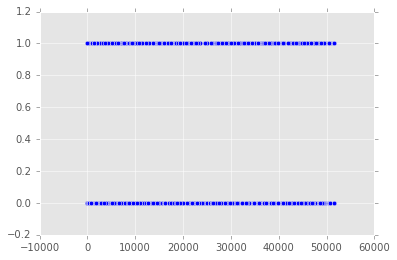

In [35]:
plt.scatter(u.labelencode(train, 'ad_slot_id'), train['click'])
plt.show()

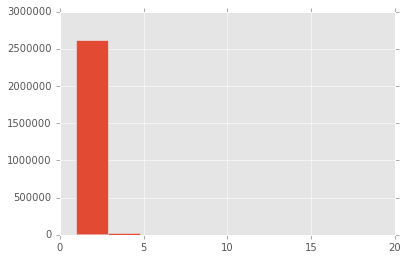

In [6]:
train['user_id'].value_counts().hist()
plt.show()

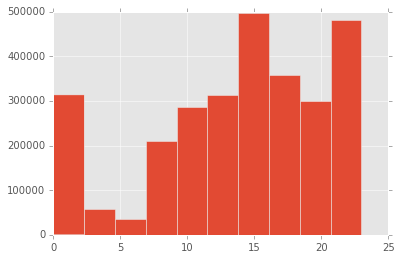

In [7]:
train['hour'].hist()
plt.show()

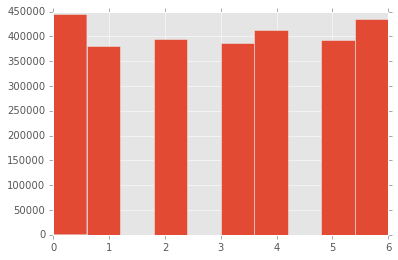

In [8]:
train['weekday'].hist()
plt.show()

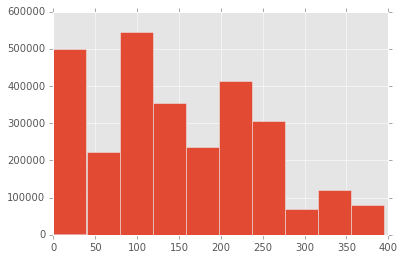

In [9]:
train['region'].hist()
plt.show()

Function to visualize dependece between response and a single factor

/home/stan/Documents/dev/webEcon/wegroup/utility.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  ndf = ndf.sort(columns=[1, 0])


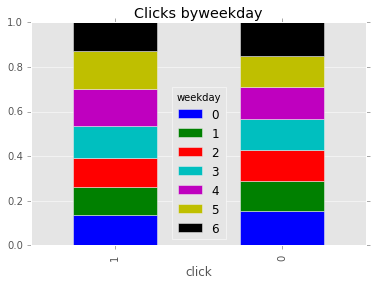

In [25]:
ndf, plot = u.draw_ct(train, "click", "weekday")

In [36]:
ndf

weekday,0,1,2,3,4,5,6
click,,,,,,,
1,0.137765,0.124759,0.130058,0.143545,0.165703,0.171002,0.127168
0,0.155990,0.133922,0.138852,0.135455,0.144754,0.137942,0.153084


Ratio of non spam to spam

In [32]:
train['click'].value_counts()

0    2845726
1       2076
Name: click, dtype: int64

In [34]:
2845726/(2845726+2076)

0.9992710167350117

Routine to create dummy prediction file

In [41]:
dummy_pred = pd.DataFrame({'Id':np.arange(1,545422),'Prediction':np.zeros(545421)})
dummy_pred.to_csv('pred.csv',index=False)